# Problem statement
Design an ANN ( Feed Forward ANN ) to identify handwritten digits ( MNIST dataset )

# Importing libraries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(2017)

Using Theano backend.


# Loading the dataset

In [2]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing data


In [3]:
#Flatten image
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#Normalize pixel data
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Initially we consider batch size of 128 and 10 epochs

In [5]:
batch_size = 128
epochs = 10

# First model: 
- 1 hidden layer with 512 nodes with relu activation
- Output layer uses softmax activation

In [6]:
#Initialise model
model = Sequential()
#Add input and hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [7]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [8]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser 
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [9]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 1.1048 - acc: 0.7543 - val_loss: 0.6035 - val_acc: 0.8629
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.5241 - acc: 0.8704 - val_loss: 0.4358 - val_acc: 0.8891
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.4215 - acc: 0.8890 - val_loss: 0.3754 - val_acc: 0.9002
Epoch 4/10
60000/60000 [==============================] - 2s - loss: 0.3750 - acc: 0.8980 - val_loss: 0.3420 - val_acc: 0.9071
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.3464 - acc: 0.9037 - val_loss: 0.3205 - val_acc: 0.9133
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.3260 - acc: 0.9087 - val_loss: 0.3036 - val_acc: 0.9170
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.3099 - acc: 0.9133 - val_loss: 0.2910 - val_acc: 0.9192
Epoch 8/10
60000/60000 [==============================] - 3s 

# Second Model:
- 2 hidden layer with 512 nodes with relu activation
- Output layer uses softmax activation

In [10]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='relu'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [11]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser 
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [13]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s - loss: 1.1186 - acc: 0.7496 - val_loss: 0.5250 - val_acc: 0.8752
Epoch 2/10
60000/60000 [==============================] - 11s - loss: 0.4505 - acc: 0.8812 - val_loss: 0.3695 - val_acc: 0.9013
Epoch 3/10
60000/60000 [==============================] - 10s - loss: 0.3586 - acc: 0.8999 - val_loss: 0.3173 - val_acc: 0.9099
Epoch 4/10
60000/60000 [==============================] - 11s - loss: 0.3176 - acc: 0.9099 - val_loss: 0.2878 - val_acc: 0.9205
Epoch 5/10
60000/60000 [==============================] - 10s - loss: 0.2915 - acc: 0.9174 - val_loss: 0.2674 - val_acc: 0.9245
Epoch 6/10
60000/60000 [==============================] - 10s - loss: 0.2717 - acc: 0.9230 - val_loss: 0.2511 - val_acc: 0.9298
Epoch 7/10
60000/60000 [==============================] - 10s - loss: 0.2560 - acc: 0.9272 - val_loss: 0.2423 - val_acc: 0.9333
Epoch 8/10
60000/60000 [==============================

# Third Model:
- 1 hidden layer with 512 nodes with sigmoid activation
- Output layer uses softmax activation





In [14]:
#Initialise model
model = Sequential()
#Add input and hidden layer
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [15]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser 
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [17]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s - loss: 1.9563 - acc: 0.5307 - val_loss: 1.6145 - val_acc: 0.7358
Epoch 2/10
60000/60000 [==============================] - 9s - loss: 1.3817 - acc: 0.7611 - val_loss: 1.1564 - val_acc: 0.7999
Epoch 3/10
60000/60000 [==============================] - 8s - loss: 1.0336 - acc: 0.8090 - val_loss: 0.8975 - val_acc: 0.8272
Epoch 4/10
60000/60000 [==============================] - 9s - loss: 0.8359 - acc: 0.8318 - val_loss: 0.7481 - val_acc: 0.8460
Epoch 5/10
60000/60000 [==============================] - 9s - loss: 0.7166 - acc: 0.8451 - val_loss: 0.6535 - val_acc: 0.8581
Epoch 6/10
60000/60000 [==============================] - 9s - loss: 0.6384 - acc: 0.8552 - val_loss: 0.5888 - val_acc: 0.8672
Epoch 7/10
60000/60000 [==============================] - 9s - loss: 0.5836 - acc: 0.8626 - val_loss: 0.5416 - val_acc: 0.8709
Epoch 8/10
60000/60000 [==============================] - 9s 

# Fourth Model:
- 2 hidden layer with 512 nodes with sigmoid activation
- Output layer uses softmax activation

In [18]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='sigmoid'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [19]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [20]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [21]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s - loss: 2.2694 - acc: 0.2013 - val_loss: 2.2288 - val_acc: 0.3223
Epoch 2/10
60000/60000 [==============================] - 17s - loss: 2.1863 - acc: 0.3811 - val_loss: 2.1337 - val_acc: 0.4811
Epoch 3/10
60000/60000 [==============================] - 16s - loss: 2.0766 - acc: 0.5276 - val_loss: 1.9972 - val_acc: 0.6421
Epoch 4/10
60000/60000 [==============================] - 16s - loss: 1.9150 - acc: 0.6062 - val_loss: 1.8022 - val_acc: 0.6409
Epoch 5/10
60000/60000 [==============================] - 16s - loss: 1.6927 - acc: 0.6556 - val_loss: 1.5525 - val_acc: 0.7362
Epoch 6/10
60000/60000 [==============================] - 16s - loss: 1.4434 - acc: 0.6970 - val_loss: 1.3060 - val_acc: 0.7541
Epoch 7/10
60000/60000 [==============================] - 12s - loss: 1.2203 - acc: 0.7353 - val_loss: 1.1078 - val_acc: 0.7609
Epoch 8/10
60000/60000 [==============================

# Fifth Model:
- 1 hidden layer with 512 nodes with tanh activation
- Output layer uses softmax activation

In [22]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='tanh', input_shape=(784,)))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [23]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [25]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.9374 - acc: 0.7750 - val_loss: 0.5455 - val_acc: 0.8667
Epoch 2/10
60000/60000 [==============================] - 4s - loss: 0.4975 - acc: 0.8704 - val_loss: 0.4270 - val_acc: 0.8886
Epoch 3/10
60000/60000 [==============================] - 4s - loss: 0.4221 - acc: 0.8851 - val_loss: 0.3798 - val_acc: 0.8962
Epoch 4/10
60000/60000 [==============================] - 4s - loss: 0.3860 - acc: 0.8928 - val_loss: 0.3543 - val_acc: 0.9015
Epoch 5/10
60000/60000 [==============================] - 4s - loss: 0.3638 - acc: 0.8981 - val_loss: 0.3375 - val_acc: 0.9061
Epoch 6/10
60000/60000 [==============================] - 5s - loss: 0.3482 - acc: 0.9016 - val_loss: 0.3254 - val_acc: 0.9094
Epoch 7/10
60000/60000 [==============================] - 4s - loss: 0.3364 - acc: 0.9051 - val_loss: 0.3160 - val_acc: 0.9114
Epoch 8/10
60000/60000 [==============================] - 4s 

# Sixth Model:
- 2 hidden layer with 512 nodes with tanh activation
- Output layer uses softmax activation

In [26]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='tanh', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='tanh'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [27]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [29]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.8065 - acc: 0.8069 - val_loss: 0.4555 - val_acc: 0.8831
Epoch 2/10
60000/60000 [==============================] - 7s - loss: 0.4232 - acc: 0.8857 - val_loss: 0.3666 - val_acc: 0.9003
Epoch 3/10
60000/60000 [==============================] - 7s - loss: 0.3659 - acc: 0.8980 - val_loss: 0.3330 - val_acc: 0.9076
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.3379 - acc: 0.9052 - val_loss: 0.3152 - val_acc: 0.9121
Epoch 5/10
60000/60000 [==============================] - 7s - loss: 0.3206 - acc: 0.9090 - val_loss: 0.3008 - val_acc: 0.9156
Epoch 6/10
60000/60000 [==============================] - 7s - loss: 0.3076 - acc: 0.9123 - val_loss: 0.2908 - val_acc: 0.9172
Epoch 7/10
60000/60000 [==============================] - 7s - loss: 0.2973 - acc: 0.9154 - val_loss: 0.2834 - val_acc: 0.9201
Epoch 8/10
60000/60000 [==============================] - 7s 

## Choosing the best model: 2 hidden layers with relu and output layer with softmax activation and increasing the number of epochs to 20

In [30]:
epochs=20

In [31]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='relu'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [32]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [33]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])


In [34]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s - loss: 1.0846 - acc: 0.7670 - val_loss: 0.5156 - val_acc: 0.8759
Epoch 2/20
60000/60000 [==============================] - 11s - loss: 0.4443 - acc: 0.8856 - val_loss: 0.3670 - val_acc: 0.9001
Epoch 3/20
60000/60000 [==============================] - 10s - loss: 0.3553 - acc: 0.9027 - val_loss: 0.3179 - val_acc: 0.9090
Epoch 4/20
60000/60000 [==============================] - 10s - loss: 0.3155 - acc: 0.9121 - val_loss: 0.2871 - val_acc: 0.9193
Epoch 5/20
60000/60000 [==============================] - 10s - loss: 0.2893 - acc: 0.9182 - val_loss: 0.2685 - val_acc: 0.9253
Epoch 6/20
60000/60000 [==============================] - 11s - loss: 0.2700 - acc: 0.9240 - val_loss: 0.2528 - val_acc: 0.9281
Epoch 7/20
60000/60000 [==============================] - 11s - loss: 0.2544 - acc: 0.9283 - val_loss: 0.2416 - val_acc: 0.9315.927 - ETA: 1
Epoch 8/20
60000/60000 [=================

## Result
Increasing the number of epochs gave us better accuracy

## Trying different batch size

In [35]:
batch_size=256

In [36]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='relu'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [37]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False),
              metrics=['accuracy'])

In [39]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s - loss: 1.5178 - acc: 0.6753 - val_loss: 0.8609 - val_acc: 0.8378
Epoch 2/20
60000/60000 [==============================] - 9s - loss: 0.6703 - acc: 0.8524 - val_loss: 0.5153 - val_acc: 0.8775
Epoch 3/20
60000/60000 [==============================] - 9s - loss: 0.4801 - acc: 0.8778 - val_loss: 0.4172 - val_acc: 0.8947
Epoch 4/20
60000/60000 [==============================] - 9s - loss: 0.4086 - acc: 0.8905 - val_loss: 0.3680 - val_acc: 0.9037
Epoch 5/20
60000/60000 [==============================] - 9s - loss: 0.3696 - acc: 0.8980 - val_loss: 0.3390 - val_acc: 0.9103
Epoch 6/20
60000/60000 [==============================] - 5s - loss: 0.3438 - acc: 0.9041 - val_loss: 0.3192 - val_acc: 0.9142
Epoch 7/20
60000/60000 [==============================] - 4s - loss: 0.3250 - acc: 0.9092 - val_loss: 0.3043 - val_acc: 0.9167
Epoch 8/20
60000/60000 [==============================] - 4s 

## Result
Increasing batch size didnt increase accuracy, it decreased infact so we'll be sticking to the old batch_size

In [40]:
batch_size=128

Trying optimiser sgd with momentum

In [41]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='relu'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [42]:
#Print model information
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Compiling model: Using categorical crossentropy loss function and sgd optimiser with momentum
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=False),
              metrics=['accuracy'])

In [44]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s - loss: 0.4347 - acc: 0.8792 - val_loss: 0.2182 - val_acc: 0.9381
Epoch 2/20
60000/60000 [==============================] - 5s - loss: 0.1952 - acc: 0.9437 - val_loss: 0.1587 - val_acc: 0.9531
Epoch 3/20
60000/60000 [==============================] - 5s - loss: 0.1428 - acc: 0.9590 - val_loss: 0.1479 - val_acc: 0.9551
Epoch 4/20
60000/60000 [==============================] - 5s - loss: 0.1131 - acc: 0.9677 - val_loss: 0.1045 - val_acc: 0.9685
Epoch 5/20
60000/60000 [==============================] - 4s - loss: 0.0914 - acc: 0.9738 - val_loss: 0.0974 - val_acc: 0.9698
Epoch 6/20
60000/60000 [==============================] - 4s - loss: 0.0764 - acc: 0.9780 - val_loss: 0.0880 - val_acc: 0.9720
Epoch 7/20
60000/60000 [==============================] - 4s - loss: 0.0644 - acc: 0.9812 - val_loss: 0.0843 - val_acc: 0.9739
Epoch 8/20
60000/60000 [==============================] - 6s 

## Trying out adagrad optimser

In [45]:
#Initialise model
model = Sequential()
#Add input and 1st hidden layer
model.add(Dense(512, activation='relu', input_shape=(784,)))
#Add 2nd hidden layer
model.add(Dense(512, activation='relu'))
#Add output layer
model.add(Dense(num_classes, activation='softmax'))

In [46]:
#Compiling model: Using categorical crossentropy loss function and adagrad optimiser
model.compile(loss='categorical_crossentropy',
              optimizer='Adagrad',
              metrics=['accuracy'])

In [47]:
#Training model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
#Evaluating model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s - loss: 0.2183 - acc: 0.9373 - val_loss: 0.0926 - val_acc: 0.9701
Epoch 2/20
60000/60000 [==============================] - 18s - loss: 0.0751 - acc: 0.9777 - val_loss: 0.0778 - val_acc: 0.9736
Epoch 3/20
60000/60000 [==============================] - 19s - loss: 0.0496 - acc: 0.9855 - val_loss: 0.0695 - val_acc: 0.9784
Epoch 4/20
60000/60000 [==============================] - 18s - loss: 0.0350 - acc: 0.9904 - val_loss: 0.0611 - val_acc: 0.9802
Epoch 5/20
60000/60000 [==============================] - 17s - loss: 0.0254 - acc: 0.9936 - val_loss: 0.0595 - val_acc: 0.9821
Epoch 6/20
60000/60000 [==============================] - 17s - loss: 0.0186 - acc: 0.9959 - val_loss: 0.0577 - val_acc: 0.9820
Epoch 7/20
60000/60000 [==============================] - 12s - loss: 0.0141 - acc: 0.9972 - val_loss: 0.0639 - val_acc: 0.9810
Epoch 8/20
60000/60000 [==============================

# Result
Adagrad optimiser gives us the best accuracy of 98.35%

## Plotting loss and accuracy of this model

In [50]:
#Function to plot loss and accuracy
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

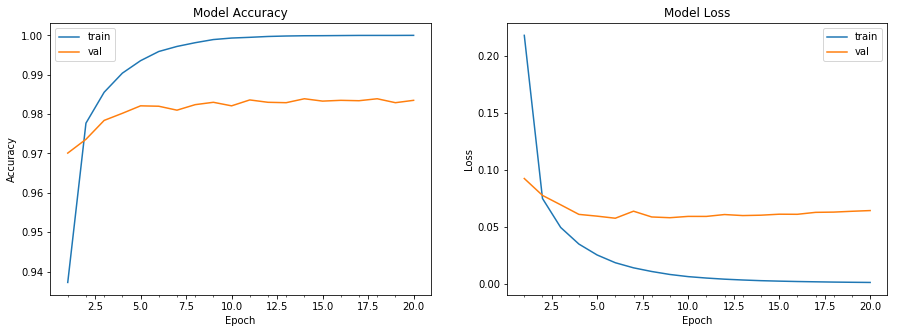

In [51]:
plot_model_history(history)

# Result
Best Results were obtained with
2 hidden layers of 512 nodes each with 'relu' activation and an output layer with 'softmax' activation
The Adagrad optimiser gave us the best result with an accuracy of 98.35%